In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.figure import Figure as plt_Figure
from matplotlib.axes import Axes as plt_Axes
from skimage import io, data
from skimage.transform import resize, rescale
from skimage.color import rgb2gray
import numpy as np
from typing import cast
import random

## Zadanie 1

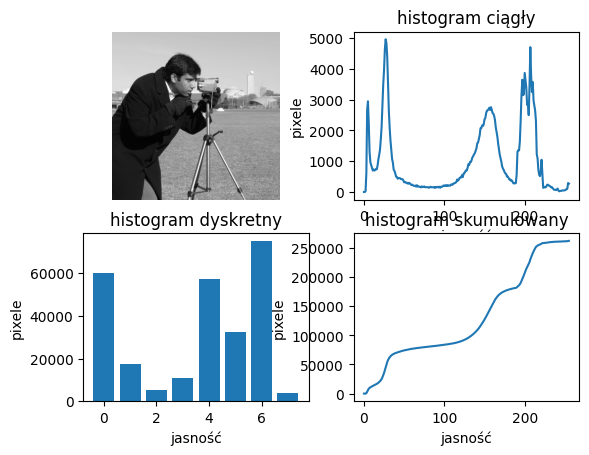

In [29]:
fig, axs = plt.subplots(2, 2)

img_camera = data.camera()
cast(plt_Axes, axs[0, 0]).imshow(img_camera, cmap="gray")
cast(plt_Axes, axs[0, 0]).axis(False)

x = np.arange(0, 256, 1)
hist, _ = np.histogram(img_camera, bins=256, range=(0, 255))
cast(plt_Axes, axs[0, 1]).plot(x, hist)
cast(plt_Axes, axs[0, 1]).set_xlabel("jasność")
cast(plt_Axes, axs[0, 1]).set_ylabel("pixele")
cast(plt_Axes, axs[0, 1]).set_title("histogram ciągły")

x = np.arange(0, 8, 1)
hist, _ = np.histogram(img_camera, bins=8, range=(0, 255))
cast(plt_Axes, axs[1, 0]).bar(x, hist)
cast(plt_Axes, axs[1, 0]).set_xlabel("jasność")
cast(plt_Axes, axs[1, 0]).set_ylabel("pixele")
cast(plt_Axes, axs[1, 0]).set_title("histogram dyskretny")

x = np.arange(0, 256, 1)
hist, _ = np.histogram(img_camera, bins=256, range=(0, 255))
hist = np.cumsum(hist)
cast(plt_Axes, axs[1, 1]).plot(x, hist)
cast(plt_Axes, axs[1, 1]).set_xlabel("jasność")
cast(plt_Axes, axs[1, 1]).set_ylabel("pixele")
cast(plt_Axes, axs[1, 1]).set_title("histogram skumulowany")

plt.show()

## Zadanie 1.1
#### Zaimplementować histogram używając numpy

[0 1 2 3 4 5 6 7]


Text(0.5, 1.0, 'histogram dyskretny')

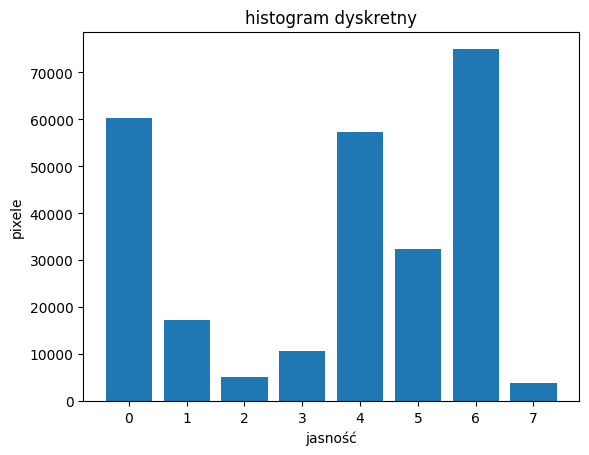

In [47]:
def my_histogram_np(img: np.ndarray, bins=256):

    imk = img // (256 // bins)
    hist = np.zeros(bins, dtype=np.uint64)
    val, cnt = np.unique(imk.flatten(), return_counts=True)
    hist[val] = cnt

    return hist

fig, ax = plt.subplots()

x = np.arange(0, 8, 1)
hist = my_histogram_np(img_camera, bins=8)
cast(plt_Axes, ax).bar(x, hist)
cast(plt_Axes, ax).set_xlabel("jasność")
cast(plt_Axes, ax).set_ylabel("pixele")
cast(plt_Axes, ax).set_title("histogram dyskretny")

#### Zaimplementować używając collections.Counter

Text(0.5, 1.0, 'histogram dyskretny')

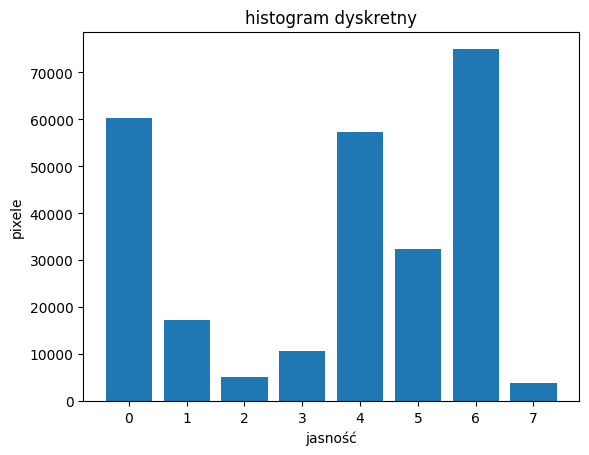

In [51]:
import collections

def my_histogram_cc(img: np.ndarray, bins=256):

    imk = img // (256 // bins)
    hist = np.zeros(bins, dtype=np.uint64)
    val_cnt = collections.Counter(imk.flatten())
    val, cnt = list(val_cnt.keys()), list(val_cnt.values())
    hist[val] = cnt

    return hist


fig, ax = plt.subplots()

x = np.arange(0, 8, 1)
hist = my_histogram_cc(img_camera, bins=8)
cast(plt_Axes, ax).bar(x, hist)
cast(plt_Axes, ax).set_xlabel("jasność")
cast(plt_Axes, ax).set_ylabel("pixele")
cast(plt_Axes, ax).set_title("histogram dyskretny")

## Zadanie 1.2

Text(0.5, 1.0, 'histogram ciągły')

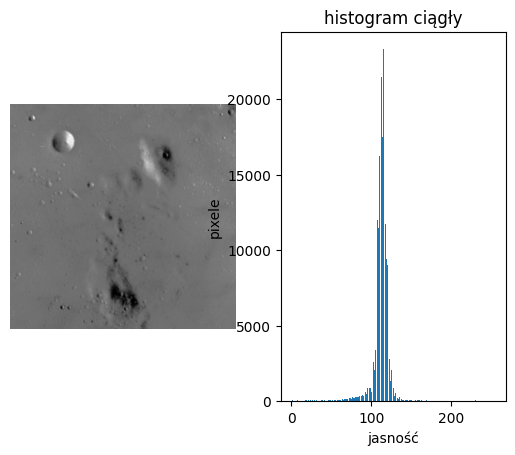

In [57]:
fig, axs = plt.subplots(1,2)

img_moon = data.moon()
cast(plt_Axes, axs[0]).imshow(img_moon, cmap="gray")
cast(plt_Axes, axs[0]).axis(False)

x = np.arange(0, 256, 1)
hist, _ = np.histogram(img_moon, bins=256, range=(0, 255))
cast(plt_Axes, axs[1]).bar(x, hist)
cast(plt_Axes, axs[1]).set_xlabel("jasność")
cast(plt_Axes, axs[1]).set_ylabel("pixele")
cast(plt_Axes, axs[1]).set_title("histogram ciągły")

Text(0.5, 1.0, 'histogram ciągły')

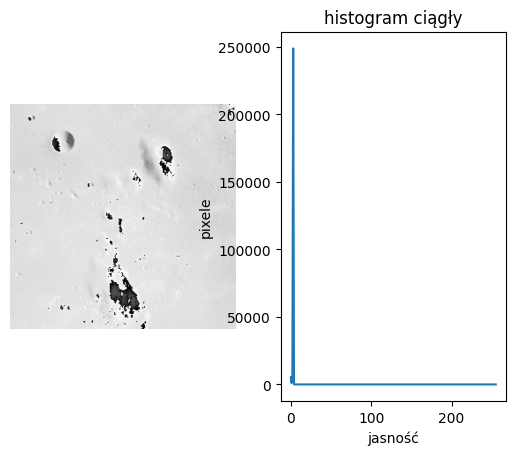

In [83]:
def map_img(img: np.ndarray, fro: tuple[int, int], to: tuple[int, int]):
    (f_min, f_max), (t_min, t_max) = fro, to
    lut = np.zeros((256,), dtype=np.uint8)
    lut[f_min:f_max] = 255*(x[f_min:f_max]-f_min)//(f_max-f_min)
    lut[:f_min] = t_min
    lut[f_max:] = t_max

img_m = map_img(img_moon, (80, 150), (0, 255))

fig, axs = plt.subplots(1, 2)

cast(plt_Axes, axs[0]).imshow(img_m, cmap="gray")
cast(plt_Axes, axs[0]).axis(False)

x = np.arange(0, 256, 1)
hist, _ = np.histogram(img_m, bins=256, range=(0, 255))
cast(plt_Axes, axs[1]).plot(x, hist)
cast(plt_Axes, axs[1]).set_xlabel("jasność")
cast(plt_Axes, axs[1]).set_ylabel("pixele")
cast(plt_Axes, axs[1]).set_title("histogram ciągły")